##Background and Context

You are a Data Scientist for a tourism company named "Visit with us". 
The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.
A viable business model is a central concept that helps you to understand the existing ways of doing the business 
and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. 
Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

However, the marketing cost was quite high because customers were contacted at random without looking at the 
available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as 
Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase 
one's sense of well being.

However, this time company wants to harness the available data of existing and potential customers to make 
the marketing expenditure more efficient.

You as a Data Scientist at "Visit with us" travel company has to analyze the customers' data and information 
to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential 
customer who is going to purchase the newly introduced package.

##Objective
To predict which customer is more likely to purchase the long term travel package.

##Data Dictionary

Customer details:
- CustomerID: Unique customer ID
- ProdTaken: Product taken flag
- Age: Age of customer
- PreferredLoginDevice: Preferred login device of the customer in last month
- CityTier: City tier
- Occupation: Occupation of customer
- Gender: Gender of customer
- NumberOfPersonVisited: Total number of person came with customer
- PreferredPropertyStar: Preferred hotel property rating by customer
- MaritalStatus: Marital status of customer
- NumberOfTrips: Average number of the trip in a year by customer
- Passport: Customer passport flag
- OwnCar: Customers owns a car flag
- NumberOfChildrenVisited: Total number of children visit with customer
- Designation: Designation of the customer in the current organization
- MonthlyIncome: Gross monthly income of the customer
- Customer interaction data: 
- PitchSatisfactionScore: Sales pitch satisfactory score
- ProductPitched: Product pitched by a salesperson
- NumberOfFollowups: Total number of follow up has been done by sales person after sales pitch
- DurationOfPitch: Duration of the pitch by a salesman to customer

##Submission Guidelines :
- Two files to be submitted: 
A well commented Jupyter notebook [format - .ipynb]
File converted to HTML format 
- Any assignment found copied/ plagiarized with other groups will not be graded and awarded zero marks
- Please ensure timely submission as any submission post-deadline will not be accepted for evaluation
- Submission will not be evaluated if it is submitted post-deadline, or, more than 2 files are submitted
Happy Learning!!

Scoring guide (Rubric) - Travel Package Purchase Prediction
Criteria	Points

Perform an Exploratory Data Analysis on the data
- Univariate analysis - Bivariate analysis - Use appropriate visualizations to identify the patterns and insights - Come up with a customer profile (characteristics of a customer) of the different packages - Any other exploratory deep dive
7.5
Illustrate the insights based on EDA
Key meaningful observations on the relationship between variables
5
Data Pre-processing
Prepare the data for analysis - Missing value Treatment, Outlier Detection(treat, if needed- why or why not ), Feature Engineering, Prepare data for modeling
7.5
Model building - Bagging
- Build bagging classifier, random forest and decision tree.
6
Model performance evaluation and improvement
- Comment on which metric is right for model performance evaluation and why? - Comment on model performance - Can model performance be improved? check and comment
9
Model building - Boosting
- Build Adaboost, gradient boost, xgboost and stacking classifier
8
Model performance evaluation and improvement
- Comment on which metric is right for model performance evaluation and why? - Comment on model performance - Can model performance be improved? check and comment
12
Actionable Insights & Recommendations
- Compare models - Business recommendations and insights
5
Points	60


Scoring guide (Rubric) - Travel Package Purchase Prediction
Criteria	Points

1) Perform an Exploratory Data Analysis on the data (7.5)

- Univariate analysis - Bivariate analysis - Use appropriate visualizations to identify the patterns and insights - Come up with a customer profile (characteristics of a customer) of the different packages - Any other exploratory deep dive 

2) Illustrate the insights based on EDA (5)
Key meaningful observations on the relationship between variables 

3) Data Pre-processing (7.5)
Prepare the data for analysis - Missing value Treatment, Outlier Detection(treat, if needed- why or why not ), Feature Engineering, Prepare data for modeling 

4) Model building - Bagging (6)
Build bagging classifier, random forest and decision tree.

5) Model performance evaluation and improvement (9)
Comment on which metric is right for model performance evaluation and why? - Comment on model performance - Can model performance be improved? check and comment

6) Model building - Boosting (8)
Build Adaboost, gradient boost, xgboost and stacking classifier

7) Model performance evaluation and improvement (12)
Comment on which metric is right for model performance evaluation and why? - Comment on model performance - Can model performance be improved? check and comment

8) Actionable Insights & Recommendations (5)
Compare models - Business recommendations and insights

Total Points	60

In [1]:
!pip install xgboost 
! install libomp

usage: install [-bCcpSsv] [-B suffix] [-f flags] [-g group] [-m mode]
               [-o owner] file1 file2
       install [-bCcpSsv] [-B suffix] [-f flags] [-g group] [-m mode]
               [-o owner] file1 ... fileN directory
       install -d [-v] [-g group] [-m mode] [-o owner] directory ...


In [2]:
#import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [3]:
#read doc
data=pd.read_excel("/Users/aurelienvallier/Desktop/AI & Machine Learning/Ensemble Techniques/Tourism.xlsx", sheet_name='Tourism')

In [4]:
#Perform an Exploratory Data Analysis on the data
#- Univariate analysis - Bivariate analysis - Use appropriate visualizations to identify the patterns and insights - Come up with a customer profile (characteristics of a customer) of the different packages - Any other exploratory deep dive
#7.5

In [5]:
data.head(23)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
5,200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0
6,200006,0,59.0,Self Enquiry,1,9.0,Small Business,Female,2,2.0,Basic,5.0,Divorced,5.0,1,2,1,1.0,Executive,17670.0
7,200007,0,30.0,Self Enquiry,1,30.0,Salaried,Male,3,3.0,Basic,3.0,Married,2.0,0,2,0,1.0,Executive,17693.0
8,200008,0,38.0,Company Invited,1,29.0,Salaried,Male,2,4.0,Standard,3.0,Unmarried,1.0,0,3,0,0.0,Senior Manager,24526.0
9,200009,0,36.0,Self Enquiry,1,33.0,Small Business,Male,3,3.0,Deluxe,3.0,Divorced,7.0,0,3,1,0.0,Manager,20237.0


In [6]:
data.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisited,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [7]:
data.shape

(4888, 20)

In [8]:
#Lets check for duplicates. No duplicate
duplicates = data.duplicated()
sum(duplicates)

0

In [9]:
#Lets check for missing values. Yes there are
data.isnull().values.any() 

True

In [10]:
# How many missing values? there are a lot of missing values. 
missingvalbycolumn=(data.isnull().sum())
print(missingvalbycolumn)

CustomerID                   0
ProdTaken                    0
Age                        226
TypeofContact               25
CityTier                     0
DurationOfPitch            251
Occupation                   0
Gender                       0
NumberOfPersonVisited        0
NumberOfFollowups           45
ProductPitched               0
PreferredPropertyStar       26
MaritalStatus                0
NumberOfTrips              140
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisited     66
Designation                  0
MonthlyIncome              233
dtype: int64


In [11]:
# For column Age, the NaN is recognised as missing value. 
pd.DataFrame({'value' : data['Age'], 'Missing?' : data['Age'].isnull()}) 

,value,Missing?
0,41.0,False
1,49.0,False
2,37.0,False
3,33.0,False
4,NaN,True
...,...,...
4883,49.0,False
4884,28.0,False
4885,52.0,False
4886,19.0,False


In [12]:
#Lets replace the NaN in column Age with average Age. 
data['Age'].fillna(data.Age.mean(), inplace = True) 
missingvalbycolumn=(data.isnull().sum())
print(missingvalbycolumn)

CustomerID                   0
ProdTaken                    0
Age                          0
TypeofContact               25
CityTier                     0
DurationOfPitch            251
Occupation                   0
Gender                       0
NumberOfPersonVisited        0
NumberOfFollowups           45
ProductPitched               0
PreferredPropertyStar       26
MaritalStatus                0
NumberOfTrips              140
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisited     66
Designation                  0
MonthlyIncome              233
dtype: int64


In [13]:
#Let's handle the other missing values 
data['DurationOfPitch'].fillna(data.DurationOfPitch.median(), inplace = True) #used median since this data is typically a round number
data['NumberOfFollowups'].fillna(data.NumberOfFollowups.median(), inplace = True) #used median since round number
data['PreferredPropertyStar'].fillna(data.PreferredPropertyStar.median(), inplace = True)#used median since round number
data['NumberOfTrips'].fillna(data.NumberOfTrips.median(), inplace = True) #used median has to be a round number
data['NumberOfChildrenVisited'].fillna(data.NumberOfChildrenVisited.median(), inplace = True) #used median since  has to be a round number
data['MonthlyIncome'].fillna(data.MonthlyIncome.median(), inplace = True) #used median to avoid giving too much weight to outliers
 
missingvalbycolumn=(data.isnull().sum())
print(missingvalbycolumn)


CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact              25
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisited       0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisited     0
Designation                 0
MonthlyIncome               0
dtype: int64


In [14]:
#for the missing value typeofcontact, since it is a categorical data and cannot be replaced by average or mean
#and since there are only 25 missing values, we will drop them.
data.dropna(inplace=True)

missingvalbycolumn=(data.isnull().sum())
print(missingvalbycolumn)

CustomerID                 0
ProdTaken                  0
Age                        0
TypeofContact              0
CityTier                   0
DurationOfPitch            0
Occupation                 0
Gender                     0
NumberOfPersonVisited      0
NumberOfFollowups          0
ProductPitched             0
PreferredPropertyStar      0
MaritalStatus              0
NumberOfTrips              0
Passport                   0
PitchSatisfactionScore     0
OwnCar                     0
NumberOfChildrenVisited    0
Designation                0
MonthlyIncome              0
dtype: int64


In [15]:
data.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisited,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,MonthlyIncome
count,4863.000000,4863.000000,4863.000000,4863.000000,4863.000000,4863.000000,4863.000000,4863.000000,4863.000000,4863.000000,4863.000000,4863.000000,4863.000000,4863.000000
mean,202449.423196,0.188567,37.661039,1.654329,15.375077,2.908081,3.713346,3.578655,3.231339,0.292412,3.079581,0.620605,1.187744,23565.411063
std,1411.628431,0.391204,9.098037,0.916498,8.335788,0.724762,0.996539,0.796907,1.822589,0.454917,1.366446,0.485286,0.852271,5270.642955
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201229.500000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20479.000000
50%,202456.000000,0.000000,37.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203671.500000,0.000000,43.000000,3.000000,19.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25447.500000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [16]:
data.info()
#HANDLING CATERGORICAL DATA
# it seems most of the data are numerical but few of them are actually categorical.
#["TypeofContact"], ["Occupation"]; ["Product Pitched"];["Gender"]; ["MaritalStatus"]; ["Designation"]
# Product Taken is boolean so only just need to be converted into Category while others are non booleans and 
#need encoding such as ["TypeofContact"], ["Occupation"]; ["Product Pitched"];["Gender"]; ["MaritalStatus"]; ["Designation"]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4863 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               4863 non-null   int64  
 1   ProdTaken                4863 non-null   int64  
 2   Age                      4863 non-null   float64
 3   TypeofContact            4863 non-null   object 
 4   CityTier                 4863 non-null   int64  
 5   DurationOfPitch          4863 non-null   float64
 6   Occupation               4863 non-null   object 
 7   Gender                   4863 non-null   object 
 8   NumberOfPersonVisited    4863 non-null   int64  
 9   NumberOfFollowups        4863 non-null   float64
 10  ProductPitched           4863 non-null   object 
 11  PreferredPropertyStar    4863 non-null   float64
 12  MaritalStatus            4863 non-null   object 
 13  NumberOfTrips            4863 non-null   float64
 14  Passport                

In [17]:
data.nunique() # from this we get that some of the categorical data are not boolean hence needs to be encoded

CustomerID                 4863
ProdTaken                     2
Age                          45
TypeofContact                 2
CityTier                      3
DurationOfPitch              34
Occupation                    4
Gender                        3
NumberOfPersonVisited         5
NumberOfFollowups             6
ProductPitched                5
PreferredPropertyStar         3
MaritalStatus                 4
NumberOfTrips                12
Passport                      2
PitchSatisfactionScore        5
OwnCar                        2
NumberOfChildrenVisited       4
Designation                   5
MonthlyIncome              2475
dtype: int64

In [18]:
data.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisited',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisited', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [19]:
#'TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation' needs to be encoded
df_dummies= pd.get_dummies(data, columns=['Gender', 'TypeofContact', 'Occupation', 'MaritalStatus'])
pd.set_option('max_columns', None)
df_dummies.head(30)

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome,Gender_Fe Male,Gender_Female,Gender_Male,TypeofContact_Company Invited,TypeofContact_Self Enquiry,Occupation_Free Lancer,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried
0,200000,1,41.000000,3,6.0,3,3.0,Deluxe,3.0,1.0,1,2,1,0.0,Manager,20993.0,0,1,0,0,1,0,0,1,0,0,0,1,0
1,200001,0,49.000000,1,14.0,3,4.0,Deluxe,4.0,2.0,0,3,1,2.0,Manager,20130.0,0,0,1,1,0,0,0,1,0,1,0,0,0
2,200002,1,37.000000,1,8.0,3,4.0,Basic,3.0,7.0,1,3,0,0.0,Executive,17090.0,0,0,1,0,1,1,0,0,0,0,0,1,0
3,200003,0,33.000000,1,9.0,2,3.0,Basic,3.0,2.0,1,5,1,1.0,Executive,17909.0,0,1,0,1,0,0,0,1,0,1,0,0,0
4,200004,0,37.622265,1,8.0,2,3.0,Basic,4.0,1.0,0,5,1,0.0,Executive,18468.0,0,0,1,0,1,0,0,0,1,1,0,0,0
5,200005,0,32.000000,1,8.0,3,3.0,Basic,3.0,1.0,0,5,1,1.0,Executive,18068.0,0,0,1,1,0,0,0,1,0,0,0,1,0
6,200006,0,59.000000,1,9.0,2,2.0,Basic,5.0,5.0,1,2,1,1.0,Executive,17670.0,0,1,0,0,1,0,0,0,1,1,0,0,0
7,200007,0,30.000000,1,30.0,3,3.0,Basic,3.0,2.0,0,2,0,1.0,Executive,17693.0,0,0,1,0,1,0,0,1,0,0,1,0,0
8,200008,0,38.000000,1,29.0,2,4.0,Standard,3.0,1.0,0,3,0,0.0,Senior Manager,24526.0,0,0,1,1,0,0,0,1,0,0,0,0,1
9,200009,0,36.000000,1,33.0,3,3.0,Deluxe,3.0,7.0,0,3,1,0.0,Manager,20237.0,0,0,1,0,1,0,0,0,1,1,0,0,0


In [20]:
#''Occupation', 'ProductPitched' remain to encoded. 
#For 'Designation' and "ProductPitched", ordering seems important to show a sense of hierarchy. So we will do 
#one hot encoding
#For the other, ordering is not important. 

In [21]:
#For Designation, lets make the following assumption in terms of ordering : Executive=1, AVP=2; VP=3; Manager=4; Senior Manager=5
#For ProductPitched, 'Basic'=1; 'Standard'=2; Deluxe=3 'Super Deluxe'=4 'King=5

replaceStruct = {
                "ProductPitched":     {"Basic": 1, "Standard": 2 ,"Deluxe": 3 ,"Super Deluxe":4, "King":5},
                "Designation": {"Executive": 1, "AVP": 2, "VP": 3,  "Manager": 4, "Senior Manager": 5},
                    }
oneHotCols=["ProductPitched","Designation"]
df_dummies=df_dummies.replace(replaceStruct)
df_dummies.drop(["CustomerID"], axis=1, inplace=True)#we also drop customer id which does not add value
dfclean=df_dummies
dfclean

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome,Gender_Fe Male,Gender_Female,Gender_Male,TypeofContact_Company Invited,TypeofContact_Self Enquiry,Occupation_Free Lancer,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried
0,1,41.000000,3,6.0,3,3.0,3,3.0,1.0,1,2,1,0.0,4,20993.0,0,1,0,0,1,0,0,1,0,0,0,1,0
1,0,49.000000,1,14.0,3,4.0,3,4.0,2.0,0,3,1,2.0,4,20130.0,0,0,1,1,0,0,0,1,0,1,0,0,0
2,1,37.000000,1,8.0,3,4.0,1,3.0,7.0,1,3,0,0.0,1,17090.0,0,0,1,0,1,1,0,0,0,0,0,1,0
3,0,33.000000,1,9.0,2,3.0,1,3.0,2.0,1,5,1,1.0,1,17909.0,0,1,0,1,0,0,0,1,0,1,0,0,0
4,0,37.622265,1,8.0,2,3.0,1,4.0,1.0,0,5,1,0.0,1,18468.0,0,0,1,0,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,49.000000,3,9.0,3,5.0,3,4.0,2.0,1,1,1,1.0,4,26576.0,0,0,1,0,1,0,0,0,1,0,0,0,1
4884,1,28.000000,1,31.0,4,5.0,1,3.0,3.0,1,3,1,2.0,1,21212.0,0,0,1,1,0,0,0,1,0,0,0,1,0
4885,1,52.000000,3,17.0,4,4.0,2,4.0,7.0,0,1,1,3.0,5,31820.0,0,1,0,0,1,0,0,1,0,0,1,0,0
4886,1,19.000000,3,16.0,3,4.0,1,3.0,3.0,0,5,0,2.0,1,20289.0,0,0,1,0,1,0,0,0,1,0,0,1,0


In [22]:
#looks we have an issue with one column called Gender_Fe Male due to a typo in one of the answers.
#We will just merge then into existing Gender_Female
dfclean["Gender_Female"]=dfclean["Gender_Female"]+dfclean["Gender_Fe Male"]
dfclean=dfclean.drop(["Gender_Fe Male"], axis=1)
dfclean

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome,Gender_Female,Gender_Male,TypeofContact_Company Invited,TypeofContact_Self Enquiry,Occupation_Free Lancer,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried
0,1,41.000000,3,6.0,3,3.0,3,3.0,1.0,1,2,1,0.0,4,20993.0,1,0,0,1,0,0,1,0,0,0,1,0
1,0,49.000000,1,14.0,3,4.0,3,4.0,2.0,0,3,1,2.0,4,20130.0,0,1,1,0,0,0,1,0,1,0,0,0
2,1,37.000000,1,8.0,3,4.0,1,3.0,7.0,1,3,0,0.0,1,17090.0,0,1,0,1,1,0,0,0,0,0,1,0
3,0,33.000000,1,9.0,2,3.0,1,3.0,2.0,1,5,1,1.0,1,17909.0,1,0,1,0,0,0,1,0,1,0,0,0
4,0,37.622265,1,8.0,2,3.0,1,4.0,1.0,0,5,1,0.0,1,18468.0,0,1,0,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,49.000000,3,9.0,3,5.0,3,4.0,2.0,1,1,1,1.0,4,26576.0,0,1,0,1,0,0,0,1,0,0,0,1
4884,1,28.000000,1,31.0,4,5.0,1,3.0,3.0,1,3,1,2.0,1,21212.0,0,1,1,0,0,0,1,0,0,0,1,0
4885,1,52.000000,3,17.0,4,4.0,2,4.0,7.0,0,1,1,3.0,5,31820.0,1,0,0,1,0,0,1,0,0,1,0,0
4886,1,19.000000,3,16.0,3,4.0,1,3.0,3.0,0,5,0,2.0,1,20289.0,0,1,0,1,0,0,0,1,0,0,1,0


In [23]:
#Univariate analysis: the independant variable is prod taken. Let's try to see if there are any other variables 
#have any relations with this one.  

In [24]:
dfclean["ProdTaken"].describe()

count    4863.000000
mean        0.188567
std         0.391204
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: ProdTaken, dtype: float64

In [25]:
#lets import the function to show a boxbplot and histogram. #function was taken from Great Learning class.
#its a good function to visualize outliers and get a feel of the distribution
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

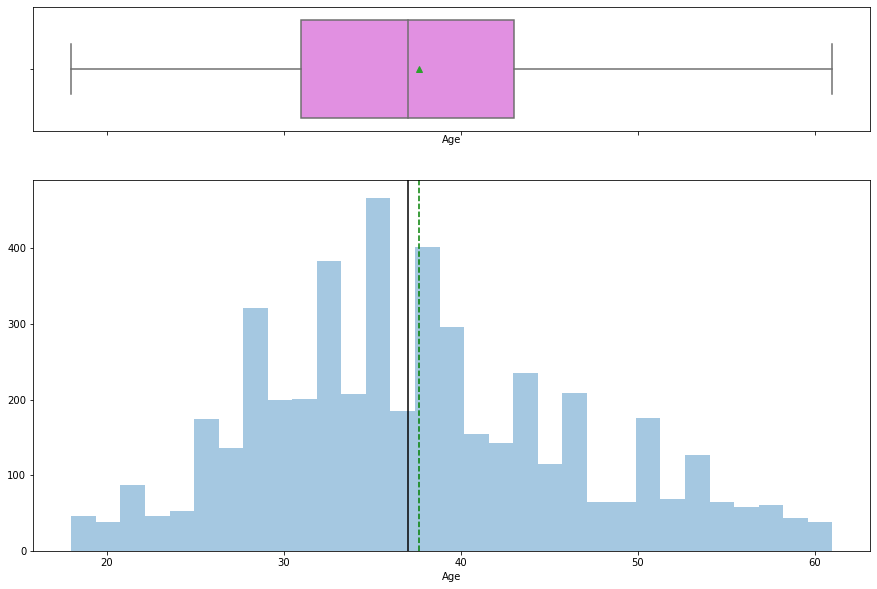

In [26]:
histogram_boxplot(dfclean["Age"])

Age seems pretty normal distribution, slight right skew, not really many outliers

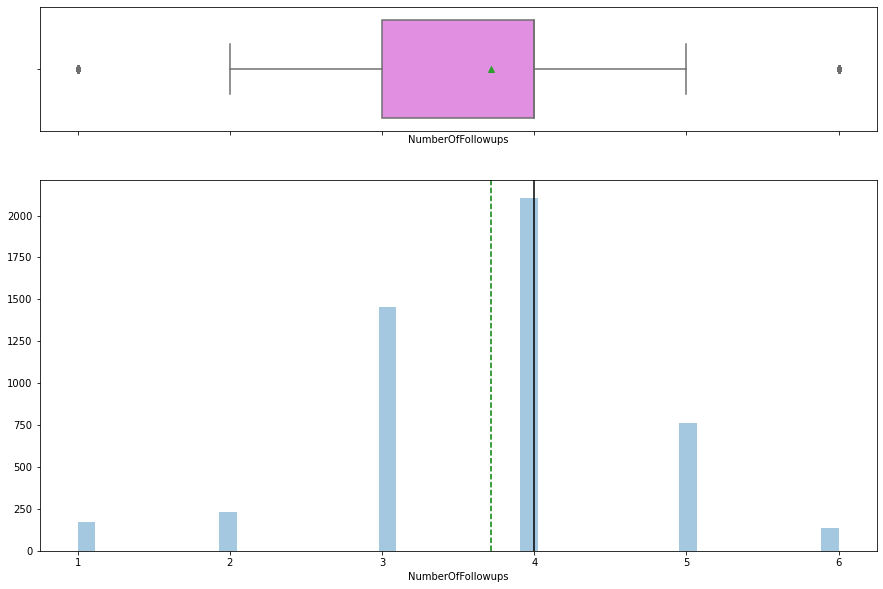

In [27]:
histogram_boxplot(dfclean["NumberOfFollowups"])

Number of follow up seems left skewed and 
Few outliers

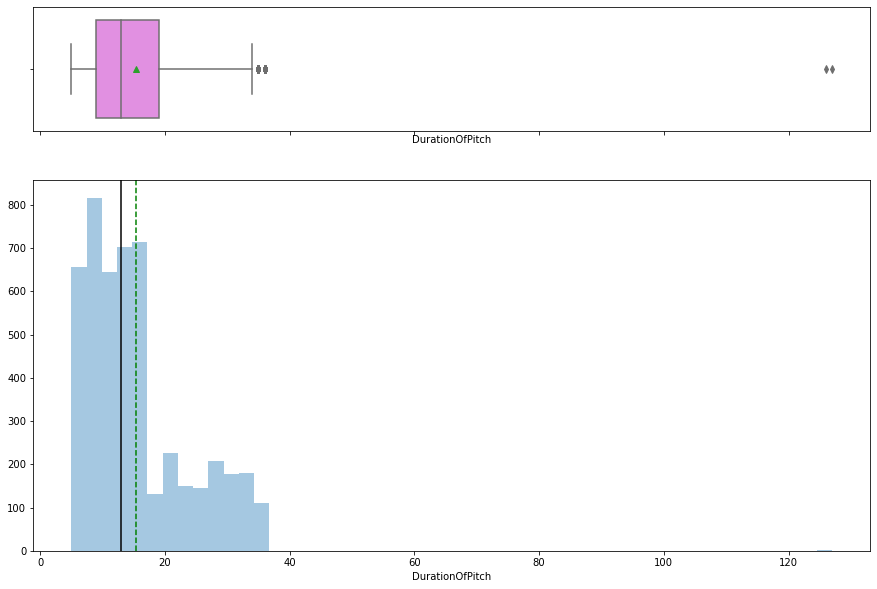

In [28]:
histogram_boxplot(dfclean["DurationOfPitch"])

Duration of Pitch seems right skewed with few extreme outliers


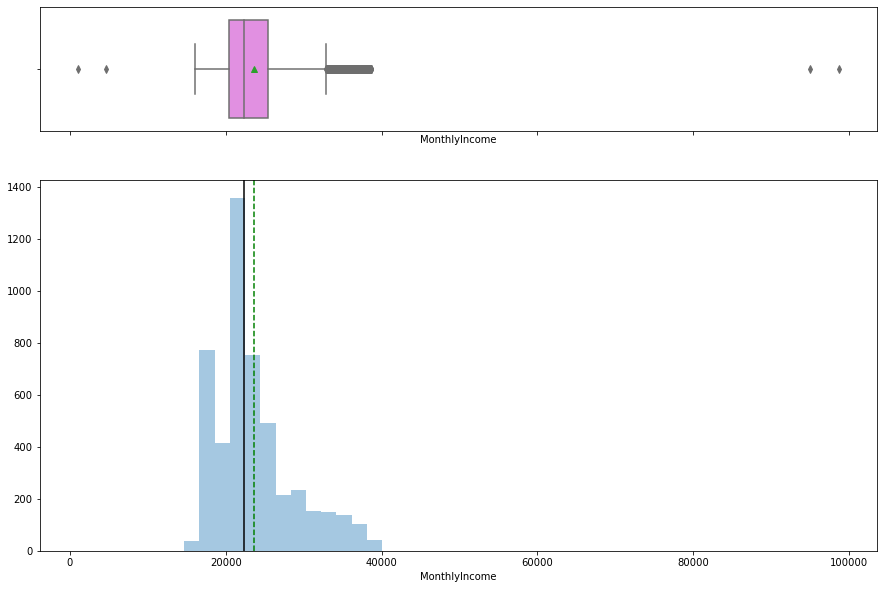

In [29]:
histogram_boxplot(dfclean["MonthlyIncome"])

Monthly Salary is right skewed, average salary is higher than median. Quite a lot of extreme outliers we might need to treat


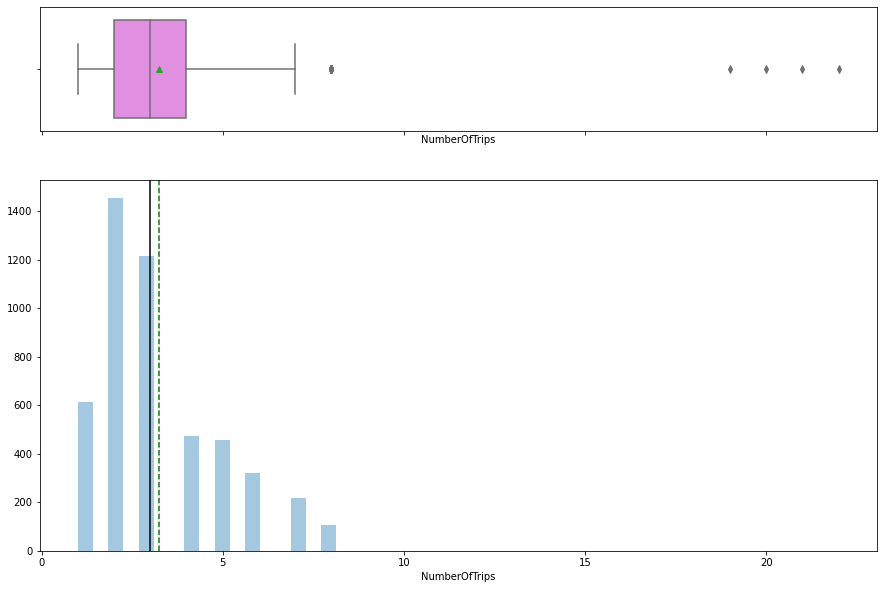

In [30]:
histogram_boxplot(dfclean["NumberOfTrips"])

Number of trips show most of the customers take 3 trips a year or less but there are a lot
of extreme outliers who do many more than that. Average is close to median.

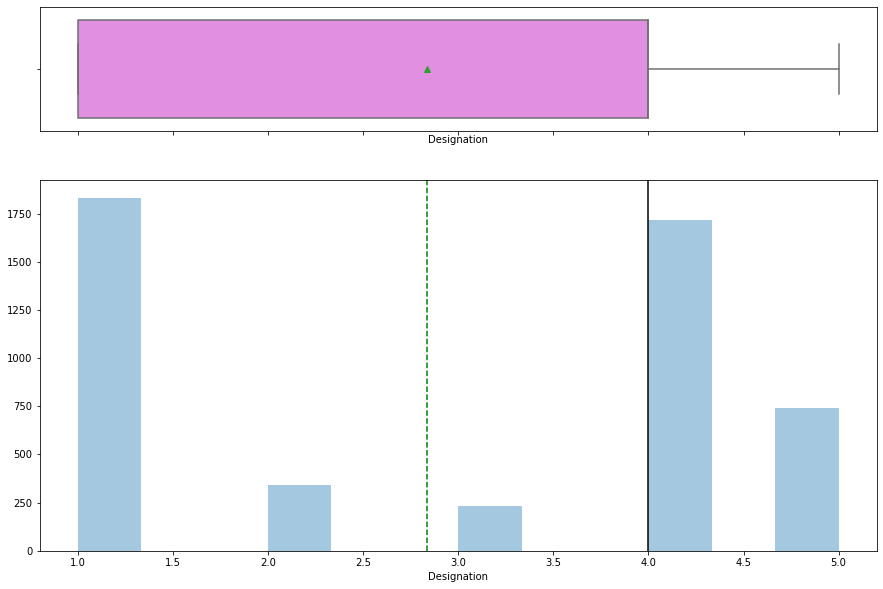

In [32]:
histogram_boxplot(dfclean["Designation"])

Left skewed. Many outliers

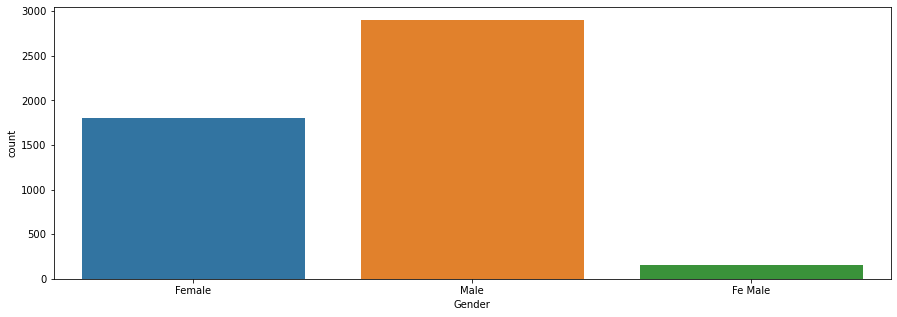

In [33]:

plt.figure(figsize=(15,5))
ax = sns.countplot(data["Gender"])


We use the initial data set to visualise gender more impactfully.
Significantly more male than female even after adding the Fe Male to Female (which we already corrected earlier).


In [34]:
#lets see if bivariate analysis show something better


In [35]:
dfclean.corr() 

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome,Gender_Female,Gender_Male,TypeofContact_Company Invited,TypeofContact_Self Enquiry,Occupation_Free Lancer,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried
ProdTaken,1.000000,-0.144572,0.087184,0.076383,0.008915,0.111774,-0.216685,0.098548,0.016980,0.261027,0.051952,-0.012020,0.007920,-0.170513,-0.126878,-0.029969,0.029969,0.049060,-0.049060,0.042077,0.070368,-0.034271,-0.007660,-0.073111,-0.118309,0.175115,0.056618
Age,-0.144572,1.000000,-0.016546,-0.007454,0.008450,-0.005079,0.417638,-0.017908,0.171557,0.029981,0.017343,0.047625,0.000443,0.226236,0.457434,0.038476,-0.038476,-0.025486,0.025486,-0.000359,-0.033653,0.000719,0.018699,0.049377,0.065918,-0.090097,-0.049788
CityTier,0.087184,-0.016546,1.000000,0.019478,-0.002017,0.024576,0.179114,-0.010499,-0.028335,0.001749,-0.041260,0.005196,0.000421,0.251205,0.051916,0.023879,-0.023879,0.009629,-0.009629,-0.014483,-0.022021,-0.142851,0.157750,0.011525,-0.036528,-0.029748,0.072860
DurationOfPitch,0.076383,-0.007454,0.019478,1.000000,0.072196,0.014951,-0.016447,-0.005711,0.013944,0.032632,-0.002856,-0.002694,0.037218,0.030268,0.003009,-0.010103,0.010103,0.026635,-0.026635,-0.016731,-0.028106,-0.031262,0.048511,-0.006367,0.025433,-0.027688,0.001790
NumberOfPersonVisited,0.008915,0.008450,-0.002017,0.072196,1.000000,0.325170,-0.036192,0.030504,0.189400,0.008551,-0.019195,0.010181,0.606655,-0.012528,0.198061,0.008297,-0.008297,0.000894,-0.000894,0.016568,-0.013046,0.002954,0.003858,0.018489,0.034487,-0.154962,0.103527
NumberOfFollowups,0.111774,-0.005079,0.024576,0.014951,0.325170,1.000000,-0.001958,-0.028840,0.136057,0.003005,0.004219,0.010685,0.282781,0.027108,0.176190,0.001437,-0.001437,0.014873,-0.014873,0.016014,0.014049,-0.001501,-0.007242,-0.015339,-0.034509,-0.048413,0.121537
ProductPitched,-0.216685,0.417638,0.179114,-0.016447,-0.036192,-0.001958,1.000000,-0.031428,0.051170,-0.026323,0.021194,0.062519,-0.005231,0.543672,0.642274,0.035832,-0.035832,-0.002462,0.002462,-0.021818,-0.069246,-0.009409,0.050352,0.039805,0.048214,-0.090975,-0.012430
PreferredPropertyStar,0.098548,-0.017908,-0.010499,-0.005711,0.030504,-0.028840,-0.031428,1.000000,0.009914,0.000654,-0.022843,0.013093,0.032006,0.007947,-0.000715,0.022976,-0.022976,-0.031854,0.031854,-0.014730,0.006213,-0.036847,0.034281,-0.002773,0.018922,-0.015691,-0.006423
NumberOfTrips,0.016980,0.171557,-0.028335,0.013944,0.189400,0.136057,0.051170,0.009914,1.000000,0.012412,-0.003925,-0.012832,0.160982,0.045427,0.115331,0.002326,-0.002326,-0.011485,0.011485,0.047512,0.038232,-0.009404,-0.014493,0.000176,0.038207,-0.075442,0.029645
Passport,0.261027,0.029981,0.001749,0.032632,0.008551,0.003005,-0.026323,0.000654,0.012412,1.000000,0.002262,-0.022825,0.018051,-0.029830,0.002577,0.037124,-0.037124,-0.002917,0.002917,0.031553,-0.004609,-0.006304,0.007739,-0.000042,0.001938,0.015427,-0.020082


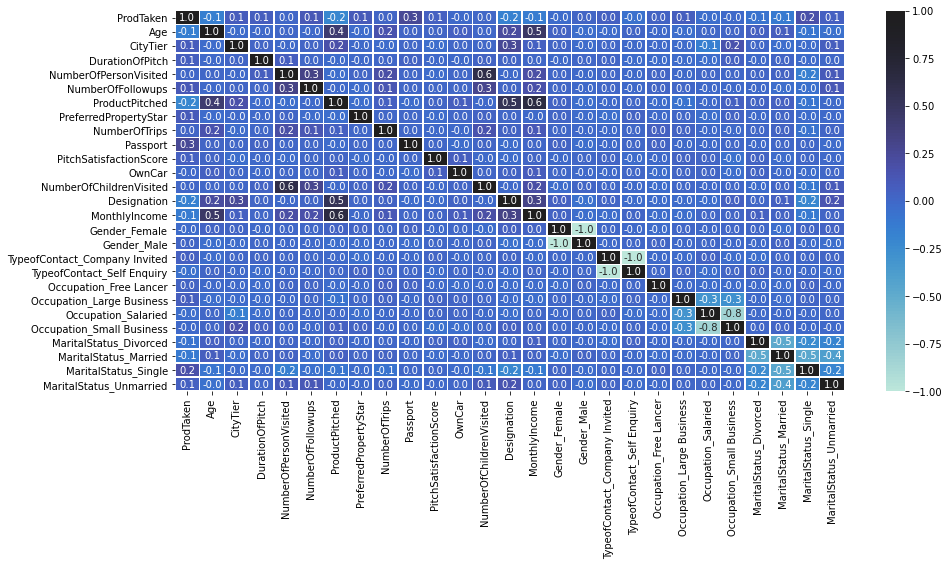

In [36]:
plt.figure(figsize=(15,7))
sns.heatmap(dfclean.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )  # heatmap
plt.show()

In [37]:
#lets check the correlation with the target variable ProdTaken
dfcorr=dfclean[dfclean.columns[:]].corr()['ProdTaken'][:]
dfcorr.sort_values(ascending=False)

ProdTaken                        1.000000
Passport                         0.261027
MaritalStatus_Single             0.175115
NumberOfFollowups                0.111774
PreferredPropertyStar            0.098548
CityTier                         0.087184
DurationOfPitch                  0.076383
Occupation_Large Business        0.070368
MaritalStatus_Unmarried          0.056618
PitchSatisfactionScore           0.051952
TypeofContact_Company Invited    0.049060
Occupation_Free Lancer           0.042077
Gender_Male                      0.029969
NumberOfTrips                    0.016980
NumberOfPersonVisited            0.008915
NumberOfChildrenVisited          0.007920
Occupation_Small Business       -0.007660
OwnCar                          -0.012020
Gender_Female                   -0.029969
Occupation_Salaried             -0.034271
TypeofContact_Self Enquiry      -0.049060
MaritalStatus_Divorced          -0.073111
MaritalStatus_Married           -0.118309
MonthlyIncome                   -0

It seems having passport, being single, having multiple follow up and having long pitch have some correlation with product taken



In [38]:
#Lets try to make a profile of customer for each type of package.
dfcorr=dfclean[dfclean.columns[:]].corr()['ProductPitched'][:]
dfcorr.sort_values(ascending=False)
#this corr table gets an idea that the kind of package has to do with Monthly income, designatation, age mostly.

ProductPitched                   1.000000
MonthlyIncome                    0.642274
Designation                      0.543672
Age                              0.417638
CityTier                         0.179114
OwnCar                           0.062519
NumberOfTrips                    0.051170
Occupation_Small Business        0.050352
MaritalStatus_Married            0.048214
MaritalStatus_Divorced           0.039805
Gender_Female                    0.035832
PitchSatisfactionScore           0.021194
TypeofContact_Self Enquiry       0.002462
NumberOfFollowups               -0.001958
TypeofContact_Company Invited   -0.002462
NumberOfChildrenVisited         -0.005231
Occupation_Salaried             -0.009409
MaritalStatus_Unmarried         -0.012430
DurationOfPitch                 -0.016447
Occupation_Free Lancer          -0.021818
Passport                        -0.026323
PreferredPropertyStar           -0.031428
Gender_Male                     -0.035832
NumberOfPersonVisited           -0

In [39]:
dfpackagesum=dfclean.groupby(["ProductPitched", "ProdTaken"]).sum()
dfpackagesum

Age  CityTier  DurationOfPitch  \
ProductPitched ProdTaken                                            
1              0          43841.582368      1645          19103.0   
               1          17425.023810       829           8622.0   
2              0          25027.000000      1076           9501.0   
               1           5081.622265       260           2358.0   
3              0          56611.669884      2819          23101.0   
               1           7678.733591       492           3750.0   
4              0          15555.000000       540           5181.0   
               1            870.000000        52            370.0   
5              0          10077.000000       296           2573.0   
               1            978.000000        36            210.0   

                          NumberOfPersonVisited  NumberOfFollowups  \
ProductPitched ProdTaken                                             
1              0                           3776             4606.0   
               1                           1597             2171.0   
2              0                           1799             2325.0   
               1                            368              488.0   
3              0                           4372             5560.0   
               1                            602              810.0   
4              0                            919             1161.0   
               1                             54               62.0   
5              0                            597              789.0   
               1                             58               86.0   

                          PreferredPropertyStar  NumberOfTrips  Passport  \
ProductPitched ProdTaken                                                   
1              0                         4497.0         3905.0       246   
               1                         2071.0         1762.0       322   
2              0                         2244.0         2087.0       162   
               1                          462.0          374.0        48   
3              0                         5362.0         4893.0       380   
               1                          754.0          754.0       100   
4              0                         1152.0         1133.0        92   
               1                           72.0           65.0        12   
5              0                          717.0          674.0        48   
               1                           72.0           67.0        12   

                          PitchSatisfactionScore  OwnCar  \
ProductPitched ProdTaken                                   
1              0                            3880     762   
               1                            1767     314   
2              0                            1842     402   
               1                             430      82   
3              0                            4547     928   
               1                             620     124   
4              0                            1072     220   
               1                              76      20   
5              0                             676     148   
               1                              66      18   

                          NumberOfChildrenVisited  Designation  MonthlyIncome  \
ProductPitched ProdTaken                                                        
1              0                           1530.0         1283     25602894.0   
               1                            673.0          549     11112389.0   
2              0                            735.0         3090     16536818.0   
               1                            139.0          620      3228392.0   
3              0                           1791.0         6052     34132670.0   
               1                            239.0          816      4706835.0   
4              0                            340.0          644     10429962.0   
  

In [40]:
#To improve our profile, we will only focus on cases where ProdTaken was successful.
dfclean_filtered = dfclean[dfclean['ProdTaken'] >0]
dfpackagesumfiltered=dfclean_filtered.groupby(["ProductPitched"]).sum()
dfpackagesumfiltered["Average Age"]=dfpackagesumfiltered["Age"]/dfpackagesumfiltered["ProdTaken"]
dfpackagesumfiltered["AverageMonthlyIncome"]=dfpackagesumfiltered["MonthlyIncome"]/dfpackagesumfiltered["ProdTaken"]
dfpackagesumfiltered["AveragePassport"]=dfpackagesumfiltered["Passport"]/dfpackagesumfiltered["ProdTaken"]
dfpackagesumfiltered["AverageOwnCar"]=dfpackagesumfiltered["OwnCar"]/dfpackagesumfiltered["ProdTaken"]
dfpackagesumfiltered["AverageNumberOfChildrenVisited"]=dfpackagesumfiltered["NumberOfChildrenVisited"]/dfpackagesumfiltered["ProdTaken"]
dfpackagesumfiltered["AverageDesignation"]=dfpackagesumfiltered["Designation"]/dfpackagesumfiltered["ProdTaken"] 
dfpackagesumfiltered["RateGender_Male"]=dfpackagesumfiltered["Gender_Male"]/dfpackagesumfiltered["ProdTaken"] 
dfpackagesumfiltered["RateGender_Female"]=dfpackagesumfiltered["Gender_Female"]/dfpackagesumfiltered["ProdTaken"] 

df_profile_by_packagetype= dfpackagesumfiltered.drop(["ProdTaken", 'Age', 'CityTier', 'DurationOfPitch',
       'NumberOfPersonVisited', 'NumberOfFollowups', 'PreferredPropertyStar',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisited', 'Designation', 'MonthlyIncome',
       'Gender_Female', 'Gender_Male', 'TypeofContact_Company Invited',
       'TypeofContact_Self Enquiry', 'Occupation_Free Lancer',
       'Occupation_Large Business', 'Occupation_Salaried',
       'Occupation_Small Business', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single',
       'MaritalStatus_Unmarried'], axis=1)
df_profile_by_packagetype


,Average Age,AverageMonthlyIncome,AveragePassport,AverageOwnCar,AverageNumberOfChildrenVisited,AverageDesignation,RateGender_Male,RateGender_Female
ProductPitched,,,,,,,,
1,31.739570,20241.145719,0.586521,0.571949,1.225865,1.0,0.621129,0.378871
2,40.980825,26035.419355,0.387097,0.661290,1.120968,5.0,0.612903,0.387097
3,37.640851,23072.720588,0.490196,0.607843,1.171569,4.0,0.656863,0.343137
4,43.500000,29823.800000,0.600000,1.000000,1.200000,2.0,0.800000,0.200000
5,48.900000,34672.100000,0.600000,0.900000,1.350000,3.0,0.400000,0.600000


#This shows profile by package type (based on pitch type only when prod was taken) using the customer profile features having the strongest correlation with prod taken
We note some interesting things:
- Basic package usually go to lowest ranked designated individuals (executives)
- king package have a lot of success with ladies (60% of them go to ladies)
- In general, the most luxurious the package, the more likely it is to be chosen by dividuals with highest monthly salary and highest designation
- the most luxurious the package, the most likely the customer own a car
- the most luxurious the package, the most children the customer visit 


In [41]:
#Outlier Detection(treat, if needed- why or why not )
#Based on the visualisation, it seems the most pressing issue with outliers is with 
#monthlysalary and numberoftrips. In particular since the upper range is uncapped, can have a distorting effect on 
#the data. We suggest to deal with outliers on the upper range (and not in the lower range since this is capped at 0)
#further from 1.5x the IQA and to replace them with the upper whisker

Q1 = dfclean.quantile(0.25)
Q3 = dfclean.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

ProdTaken                           0.0
Age                                12.0
CityTier                            2.0
DurationOfPitch                    10.0
NumberOfPersonVisited               1.0
NumberOfFollowups                   1.0
ProductPitched                      2.0
PreferredPropertyStar               1.0
NumberOfTrips                       2.0
Passport                            1.0
PitchSatisfactionScore              2.0
OwnCar                              1.0
NumberOfChildrenVisited             1.0
Designation                         3.0
MonthlyIncome                    4968.5
Gender_Female                       1.0
Gender_Male                         1.0
TypeofContact_Company Invited       1.0
TypeofContact_Self Enquiry          1.0
Occupation_Free Lancer              0.0
Occupation_Large Business           0.0
Occupation_Salaried                 1.0
Occupation_Small Business           1.0
MaritalStatus_Divorced              0.0
MaritalStatus_Married               1.0


In [42]:
#Replace every outlier on the upper side of Monthly Income by the upper whisker    
dfclean2 = dfclean.copy()
dfclean_income=dfclean["MonthlyIncome"]

Q1= dfclean_income.quantile(0.25)
Q3= dfclean_income.quantile(0.75)
IQR = Q3 - Q1
for i in (np.where(dfclean_income > Q3 + 1.5 * IQR)):
    
    whisker  = Q3 + 1.5 * IQR
    dfclean_income.iloc[i] = whisker



In [43]:
#Replace every outlier on the upper side of NumberofTrips by the upper whisker
dfclean_numberoftrips=dfclean["NumberOfTrips"]

Q1= dfclean_numberoftrips.quantile(0.25)
Q3= dfclean_numberoftrips.quantile(0.75)
IQR = Q3 - Q1
for i in (np.where(dfclean_numberoftrips > Q3 + 1.5 * IQR)):
    
    whisker  = Q3 + 1.5 * IQR
    dfclean_numberoftrips.iloc[i] = whisker
#replacing the columns MonthlyIncome and NumberofTrips with the same columns where upper side of the whisker
#are replaced by the upper whisker
dfclean['MonthlyIncome'] = dfclean_income
dfclean['NumberOfTrips']= dfclean_numberoftrips


In [44]:
##4) Model building - Bagging (6)
##Build bagging classifier, random forest and decision tree.
#Import models (note that decision tree model is already imported)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [45]:
#1) Decision Tree
#Split Data
x = dfclean.drop(["ProdTaken"], axis=1)
y = dfclean["ProdTaken"]
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3 , random_state=1, stratify=y)
#Build Decision tree
decisiontree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
decisiontree.fit(xtrain, ytrain)

#Build Bagging classifier
bagging=BaggingClassifier(random_state=1)
bagging.fit(xtrain,ytrain)

#Build Random Forest classifier
randomforest=RandomForestClassifier(random_state=1)
randomforest.fit(xtrain,ytrain)



RandomForestClassifier(random_state=1)

In [46]:
#Model performance evaluation and improvement (9) 
##Comment on which metric is right for model performance evaluation and why? - 
##Comment on model performance - Can model performance be improved? check and comment

In [47]:
#Lets add a function to check the various metrics (template taken from Ensemble Hands-On-Bagging)
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(xtrain)
    pred_test = model.predict(xtest)
    
    #Accuracy of the model
    train_acc = model.score(xtrain,ytrain)
    test_acc = model.score(xtest,ytest)
    
    #Recall of the model
    train_recall = metrics.recall_score(ytrain,pred_train)
    test_recall = metrics.recall_score(ytest,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(ytrain,pred_train)
    test_precision = metrics.precision_score(ytest,pred_test)
        
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(xtrain,ytrain))
        print("Accuracy on test set : ",model.score(xtest,ytest))
        print("Recall on training set : ",metrics.recall_score(ytrain,pred_train))
        print("Recall on test set : ",metrics.recall_score(ytest,pred_test))
        print("Precision on training set : ",metrics.precision_score(ytrain,pred_train))
        print("Precision on test set : ",metrics.precision_score(ytest,pred_test))
    
    return score_list # returning the list with train and test scores

In [48]:
##  Lets aslo add a function to calculate r2_score and RMSE on train and test data (imported from Case Study Bike)
def get_model_score(model, flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(xtrain)
    pred_test = model.predict(xtest)
    
    train_r2=metrics.r2_score(ytrain,pred_train)
    test_r2=metrics.r2_score(ytest,pred_test)
    train_rmse=np.sqrt(metrics.mean_squared_error(ytrain,pred_train))
    test_rmse=np.sqrt(metrics.mean_squared_error(ytest,pred_test))
    
    #Adding all scores in the list
    score_list.extend((train_r2,test_r2,train_rmse,test_rmse))
    
    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag==True: 
        print("R-square on training set : ",metrics.r2_score(ytrain,pred_train))
        print("R-square on test set : ",metrics.r2_score(ytest,pred_test))
        print("RMSE on training set : ",np.sqrt(metrics.mean_squared_error(ytrain,pred_train)))
        print("RMSE on test set : ",np.sqrt(metrics.mean_squared_error(ytest,pred_test)))
    
    # returning the list with train and test scores
    return score_list

In [49]:
bagging_score=get_metrics_score(bagging)

Accuracy on training set :  0.9926556991774383
Accuracy on test set :  0.9088416723783413
Recall on training set :  0.9641744548286605
Recall on test set :  0.6363636363636364
Precision on training set :  0.9967793880837359
Precision on test set :  0.8413461538461539


In [50]:
randomforest_score=get_metrics_score(randomforest)

Accuracy on training set :  1.0
Accuracy on test set :  0.9252912954078135
Recall on training set :  1.0
Recall on test set :  0.6436363636363637
Precision on training set :  1.0
Precision on test set :  0.9414893617021277


In [51]:
decisiontree_score=get_metrics_score(decisiontree)

Accuracy on training set :  1.0
Accuracy on test set :  0.8855380397532556
Recall on training set :  1.0
Recall on test set :  0.7418181818181818
Precision on training set :  1.0
Precision on test set :  0.68


In [52]:
#make confusion matrix. We add the function taken from practice exercise loan delinquent
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(xtest)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

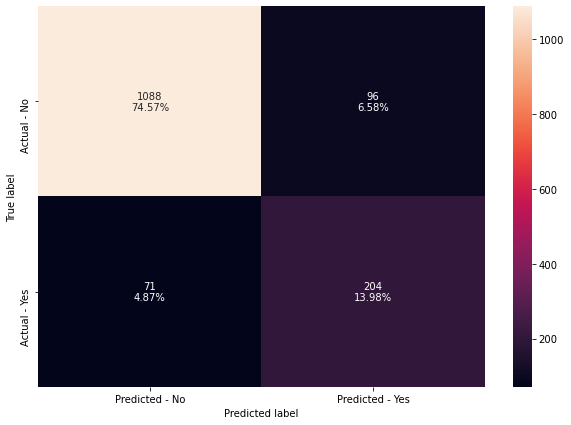

In [53]:
make_confusion_matrix(decisiontree,ytest)

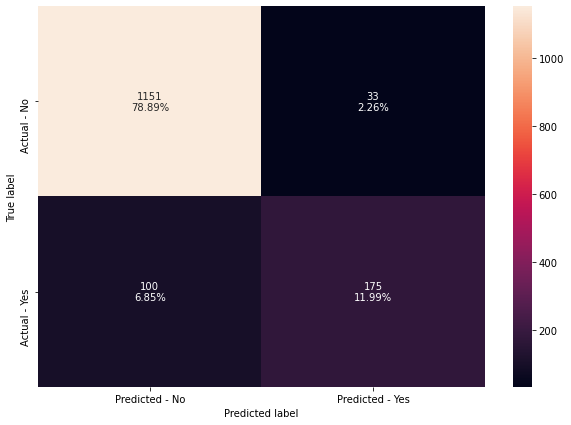

In [54]:
make_confusion_matrix(bagging,ytest)

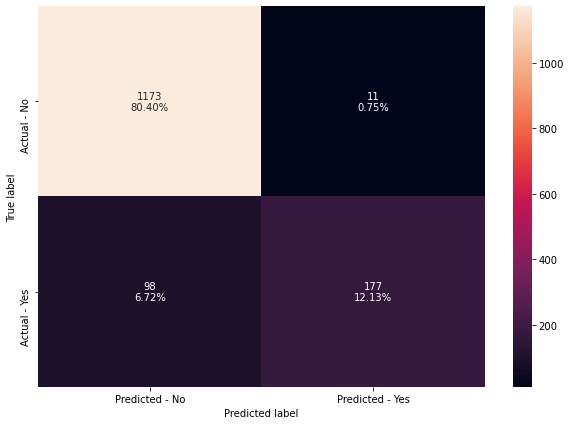

In [55]:
make_confusion_matrix(randomforest,ytest)

In [56]:
#Comments on performances and relevant metrics on untuned Decision tree, bagging and random forest:

All models show clear overfit. 
The most important metrics is to make sure we dont miss out on predicting the customer who are actually going to take the package. So recall is number one important criterias. Making sure we do not chase client who won't take the package is also important to make sure we do not waste money on the marketing campaing. So Precision is number 2 criterias.

Decision tree has best recall on testing set (74%). 
We have not done any tuning so cant conclude too much.

In [57]:
#Hypertuning of Decision tree, Bagging and random forest.
#We are trying to improve the performances of those models.

In [58]:
#1) decision tree hypertuning
decisiontree_tuned = DecisionTreeClassifier(random_state=1)

parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20, 30, 40],
              'max_leaf_nodes' : [10,15,20,25,30],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

acc_scorer = metrics.make_scorer(metrics.recall_score)


grid_obj = GridSearchCV(decisiontree_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(xtrain, ytrain)

decisiontree_tuned = grid_obj.best_estimator_

decisiontree_tuned.fit(xtrain, ytrain)


DecisionTreeClassifier(max_depth=7, max_leaf_nodes=25,
                       min_impurity_decrease=0.0001, min_samples_leaf=15,
                       random_state=1)

In [60]:
#2) bagging hypertuning
bagging_tuned= BaggingClassifier(random_state=1)

parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }
acc_scorer = metrics.make_scorer(metrics.recall_score)

grid_obj = GridSearchCV(bagging_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(xtrain, ytrain)

bagging_tuned = grid_obj.best_estimator_

bagging_tuned.fit(xtrain, ytrain)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=40,
                  random_state=1)

In [61]:
#3) randomforest hypertuning
randomforest_tuned = RandomForestClassifier(random_state=1)
parameters = {
    "n_estimators": [150,200,250],
    "min_samples_leaf": np.arange(3, 10),
    "max_features": np.arange(3, 10, 1),# we used square root of 28 (number of columns) and make sure its within the search range
    "max_samples": np.arange(0.3, 0.7, 0.1),
                           }
acc_scorer = metrics.make_scorer(metrics.recall_score)


grid_obj = GridSearchCV(randomforest_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(xtrain, ytrain)

randomforest_tuned = grid_obj.best_estimator_

randomforest_tuned.fit(xtrain, ytrain)


RandomForestClassifier(max_features=8, max_samples=0.6000000000000001,
                       min_samples_leaf=3, n_estimators=200, random_state=1)

In [62]:
# Bagging tuning results and conclusion on performances

bagging_score=get_model_score(bagging)
bagging_score=get_metrics_score(bagging)
bagging_tuned_score=get_model_score(bagging_tuned)
bagging_score=get_metrics_score(bagging_tuned)

R-square on training set :  0.9520077780108775
R-square on test set :  0.4040325552825551
RMSE on training set :  0.08569889627388262
RMSE on test set :  0.3019243740105437
Accuracy on training set :  0.9926556991774383
Accuracy on test set :  0.9088416723783413
Recall on training set :  0.9641744548286605
Recall on test set :  0.6363636363636364
Precision on training set :  0.9967793880837359
Precision on test set :  0.8413461538461539
R-square on training set :  0.9961606222408702
R-square on test set :  0.5474232186732185
RMSE on training set :  0.02423930827818598
RMSE on test set :  0.263107386661218
Accuracy on training set :  0.999412455934195
Accuracy on test set :  0.9307745030843043
Recall on training set :  0.9968847352024922
Recall on test set :  0.6836363636363636
Precision on training set :  1.0
Precision on test set :  0.9306930693069307


Conclusion Bagging tuning:
- Improvement of recall from 0.63 to 0.68 and of precision (from .84 to .93) which is not satisfactory.
- Very high metrics for training set seem to indicate overfitting.



In [63]:
# Random forest tuning results and conclusion on performances
randomforest_score=get_model_score(randomforest)
randomforest_score=get_metrics_score(randomforest)
randomforest_tuned_score=get_model_score(randomforest_tuned)
randomforest_score=get_metrics_score(randomforest_tuned)

R-square on training set :  1.0
R-square on test set :  0.5115755528255527
RMSE on training set :  0.0
RMSE on test set :  0.27332893112911855
Accuracy on training set :  1.0
Accuracy on test set :  0.9252912954078135
Recall on training set :  1.0
Recall on test set :  0.6436363636363637
Precision on training set :  1.0
Precision on test set :  0.9414893617021277
R-square on training set :  0.5450337355431187
R-square on test set :  0.229275184275184
RMSE on training set :  0.2638635476868392
RMSE on test set :  0.3433496250828753
Accuracy on training set :  0.9303760282021152
Accuracy on test set :  0.882111034955449
Recall on training set :  0.6417445482866043
Recall on test set :  0.4254545454545455
Precision on training set :  0.9832935560859188
Precision on test set :  0.8931297709923665


['Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisited', 'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisited', 'Designation', 'MonthlyIncome', 'Gender_Female', 'Gender_Male', 'TypeofContact_Company Invited', 'TypeofContact_Self Enquiry', 'Occupation_Free Lancer', 'Occupation_Large Business', 'Occupation_Salaried', 'Occupation_Small Business', 'MaritalStatus_Divorced', 'MaritalStatus_Married', 'MaritalStatus_Single', 'MaritalStatus_Unmarried']


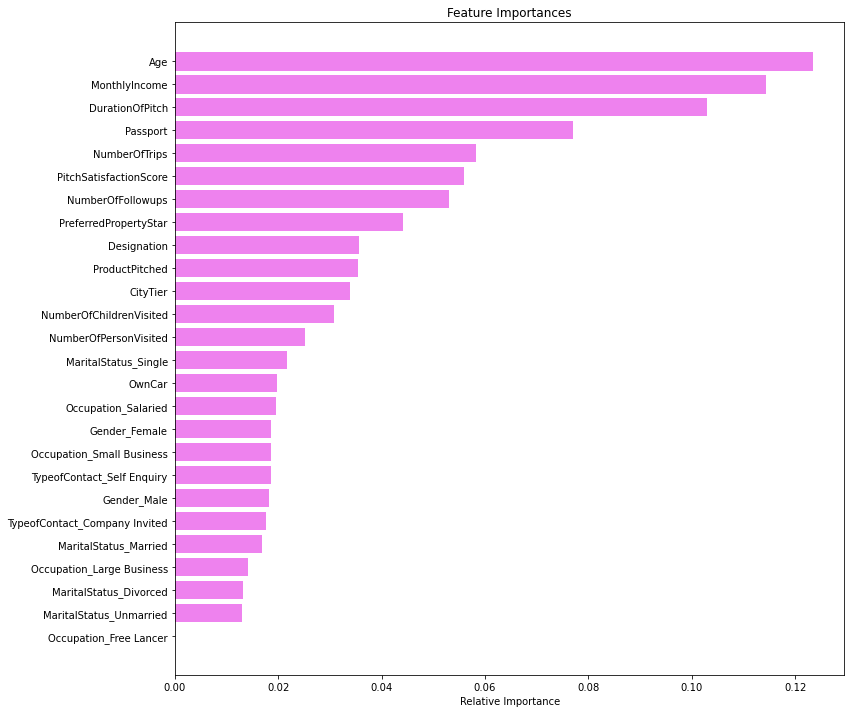

In [98]:
#We import a function to check the most important features for each model (from Case Study Bike)

#Most important Features for randomforest: age, monthly income, duration of pitch
column_names = list(x.columns)
feature_names = column_names
print(feature_names)

importances = randomforest.feature_importances_
indices = np.argsort(importances)
feature_names = list(x.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()



['Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisited', 'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisited', 'Designation', 'MonthlyIncome', 'Gender_Female', 'Gender_Male', 'TypeofContact_Company Invited', 'TypeofContact_Self Enquiry', 'Occupation_Free Lancer', 'Occupation_Large Business', 'Occupation_Salaried', 'Occupation_Small Business', 'MaritalStatus_Divorced', 'MaritalStatus_Married', 'MaritalStatus_Single', 'MaritalStatus_Unmarried']


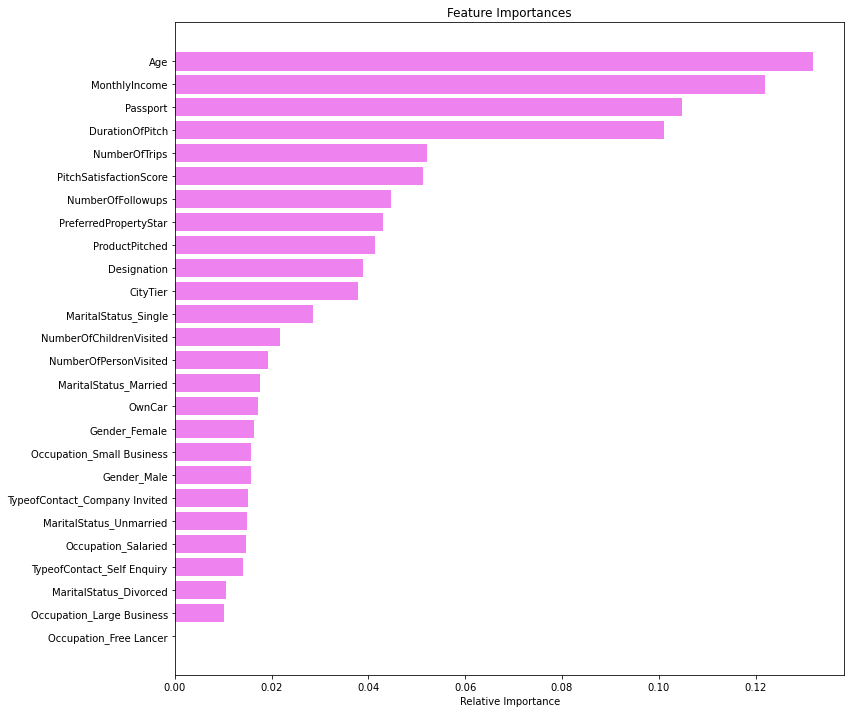

In [99]:
#Most important Features for randomforest_tuned:age, monthly income, duration of pitch
column_names = list(x.columns)
feature_names = column_names
print(feature_names)

importances = randomforest_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(x.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()



Conclusion random forest tuning: 
- Tuning reduced overfitting but did not improve recall or precision.
- Most important features remain the same: age, monthly income, duration of pitch
    

In [78]:
# Decision tree tuning results and conclusion on performances
decisiontree_score=get_model_score(decisiontree)
decisiontree_score=get_metrics_score(decisiontree)
decisiontree_tuned_score=get_model_score(decisiontree_tuned)
decisiontree_score=get_metrics_score(decisiontree_tuned)

R-square on training set :  1.0
R-square on test set :  0.2516799754299752
RMSE on training set :  0.0
RMSE on test set :  0.33832227276185106
Accuracy on training set :  1.0
Accuracy on test set :  0.8855380397532556
Recall on training set :  1.0
Recall on test set :  0.7418181818181818
Precision on training set :  1.0
Precision on test set :  0.68
R-square on training set :  0.06127213789276387
R-square on test set :  -0.01717751842751869
RMSE on training set :  0.3790178413865325
RMSE on test set :  0.3944439349520093
Accuracy on training set :  0.8563454759106933
Accuracy on test set :  0.8444139821795751
Recall on training set :  0.4205607476635514
Recall on test set :  0.36727272727272725
Precision on training set :  0.6976744186046512
Precision on test set :  0.6558441558441559


['Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisited', 'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisited', 'Designation', 'MonthlyIncome', 'Gender_Female', 'Gender_Male', 'TypeofContact_Company Invited', 'TypeofContact_Self Enquiry', 'Occupation_Free Lancer', 'Occupation_Large Business', 'Occupation_Salaried', 'Occupation_Small Business', 'MaritalStatus_Divorced', 'MaritalStatus_Married', 'MaritalStatus_Single', 'MaritalStatus_Unmarried']


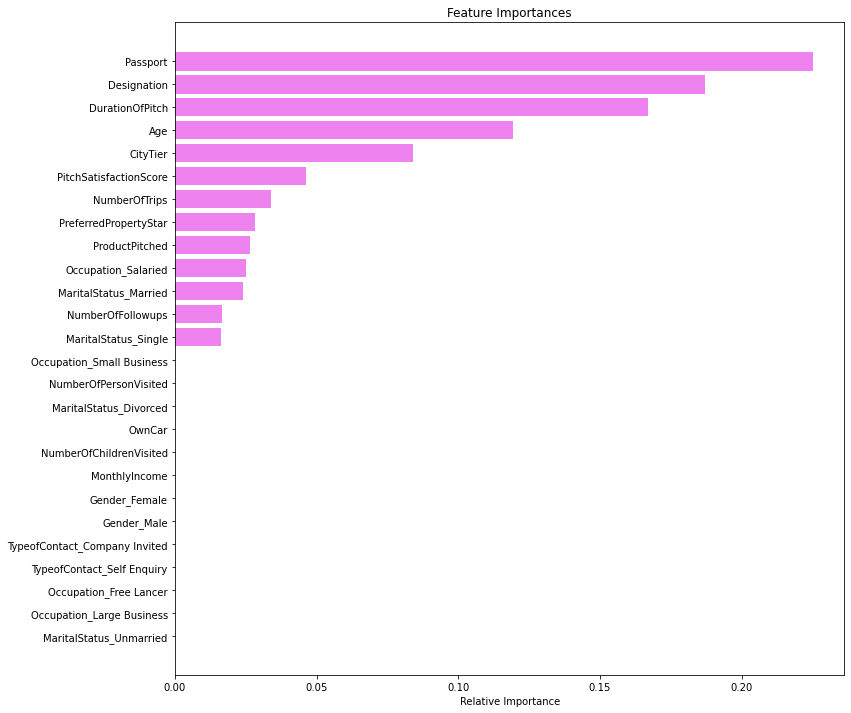

In [77]:
#Most important Features for Decisiontree_tuned
column_names = list(x.columns)
feature_names = column_names
print(feature_names)

importances = decisiontree_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(x.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()



['Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisited', 'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisited', 'Designation', 'MonthlyIncome', 'Gender_Female', 'Gender_Male', 'TypeofContact_Company Invited', 'TypeofContact_Self Enquiry', 'Occupation_Free Lancer', 'Occupation_Large Business', 'Occupation_Salaried', 'Occupation_Small Business', 'MaritalStatus_Divorced', 'MaritalStatus_Married', 'MaritalStatus_Single', 'MaritalStatus_Unmarried']


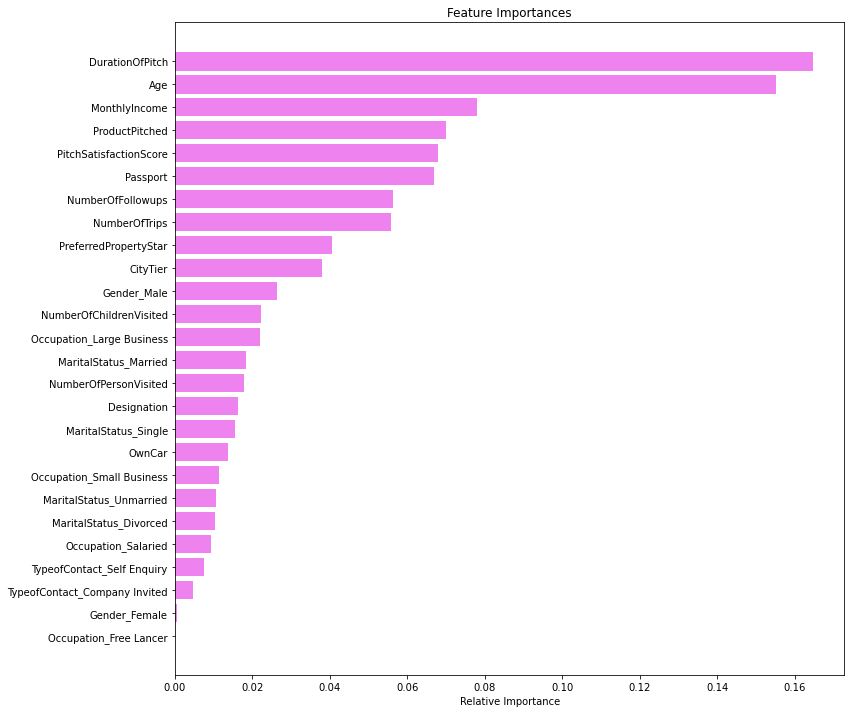

In [79]:
#Most important Features for Decisiontree
column_names = list(x.columns)
feature_names = column_names
print(feature_names)

importances = decisiontree.feature_importances_
indices = np.argsort(importances)
feature_names = list(x.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()



Conclusion Decision Tree Tuning:
- tuning was not very successful as recall initially high (.74) dropped to 0.37 and rmse increased
- we managed to reduce the overfitting though
- The tuning changes in a meaningful way the importance of the features. Passport and designation becomes much more important under tuned model.

In [65]:
#Model building - Boosting (8) 
#Build Adaboost, gradient boost, xgboost and stacking classifier

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
#To install xgboost library use - !pip install xgboost 
from xgboost import XGBClassifier

In [67]:
#1) boosting model building
#adaboost
adaboost = AdaBoostClassifier(random_state=1)
adaboost.fit(xtrain,ytrain)
#gradient boost
gradientboost=GradientBoostingClassifier(random_state=1)
gradientboost.fit(xtrain, ytrain)
#xgb boost
xgboost=XGBClassifier (random_state=1)
xgboost.fit(xtrain, ytrain)


[17:45:49] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [68]:
#7) Model performance evaluation and improvement (12) 
#Comment on which metric is right for model performance evaluation and why? - 
#Comment on model performance - Can model performance be improved? check and comment

#Adaboost classifier hypertuning
adaboost_tuned = AdaBoostClassifier(random_state=1)
parameters = {'n_estimators': np.arange(10,100,10), #"Standard" parameters
              'learning_rate': [1, 0.1, 0.5, 0.01],
              }
scorer = metrics.make_scorer(metrics.r2_score)
grid_obj = GridSearchCV(adaboost_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(xtrain, ytrain)
adaboost_tuned = grid_obj.best_estimator_
adaboost_tuned.fit(xtrain, ytrain)




AdaBoostClassifier(learning_rate=0.5, n_estimators=70, random_state=1)

In [69]:
# Adaboost tuning results and conclusion on performances


adaboost_score=get_model_score(adaboost)
adaboost_score=get_metrics_score(adaboost)
adaboost_tuned_score=get_model_score(adaboost_tuned)
adaboost_score=get_metrics_score(adaboost_tuned)

R-square on training set :  0.00368147150581688
R-square on test set :  0.058998771498771196
RMSE on training set :  0.3904711065832922
RMSE on test set :  0.37938661218851955
Accuracy on training set :  0.8475323149236192
Accuracy on test set :  0.8560657984921178
Recall on training set :  0.3411214953271028
Recall on test set :  0.36
Precision on training set :  0.6952380952380952
Precision on test set :  0.7443609022556391
R-square on training set :  0.011360227024076464
R-square on test set :  0.02763206388206363
RMSE on training set :  0.3889634905036343
RMSE on test set :  0.38565789013685625
Accuracy on training set :  0.8487074030552292
Accuracy on test set :  0.8512679917751885
Recall on training set :  0.29283489096573206
Recall on test set :  0.3054545454545455
Precision on training set :  0.7550200803212851
Precision on test set :  0.7636363636363637


['Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisited', 'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisited', 'Designation', 'MonthlyIncome', 'Gender_Female', 'Gender_Male', 'TypeofContact_Company Invited', 'TypeofContact_Self Enquiry', 'Occupation_Free Lancer', 'Occupation_Large Business', 'Occupation_Salaried', 'Occupation_Small Business', 'MaritalStatus_Divorced', 'MaritalStatus_Married', 'MaritalStatus_Single', 'MaritalStatus_Unmarried']


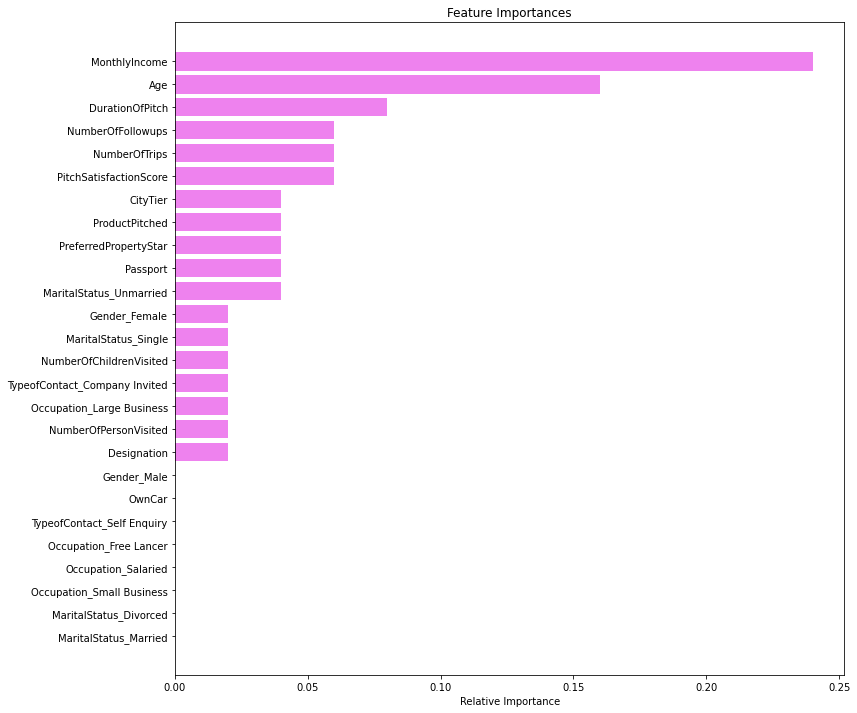

In [80]:
#Adaboost most important features: Monthly Income, age, duration of pitch.
column_names = list(x.columns)
feature_names = column_names
print(feature_names)

importances = adaboost.feature_importances_
indices = np.argsort(importances)
feature_names = list(x.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

['Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisited', 'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisited', 'Designation', 'MonthlyIncome', 'Gender_Female', 'Gender_Male', 'TypeofContact_Company Invited', 'TypeofContact_Self Enquiry', 'Occupation_Free Lancer', 'Occupation_Large Business', 'Occupation_Salaried', 'Occupation_Small Business', 'MaritalStatus_Divorced', 'MaritalStatus_Married', 'MaritalStatus_Single', 'MaritalStatus_Unmarried']


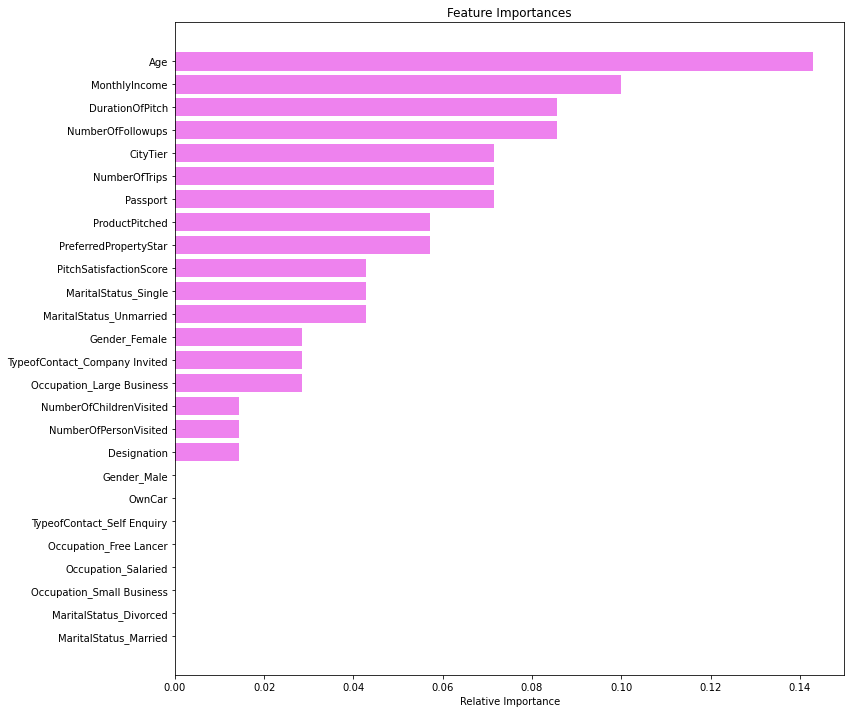

In [81]:
#Adaboost_tuned most important features: Age, Monthly Income duration of pitch.
column_names = list(x.columns)
feature_names = column_names
print(feature_names)

importances = adaboost_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(x.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Conclusion AdaBoost:
- We note that the tuning has not improved the recall. Already poor originally (.36) it became worse (.3).
- This model is not well suited for our purpose it seems
- Tuning keeps the same top 3 features but affects the order of the most important features, with age now number one.

In [70]:
#Gradientboosting classifier hypertuning
gradientboost_tuned = GradientBoostingClassifier(random_state=1)
parameters = {'n_estimators': np.arange(50,200,25), 
              'subsample':[0.7,0.8,0.9,1],
              'max_features':[0.7,0.8,0.9,1],
              'max_depth':[3,5,7,10]
              }
scorer = metrics.make_scorer(metrics.r2_score)
grid_obj = GridSearchCV(gradientboost_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(xtrain, ytrain)
gradientboost_tuned = grid_obj.best_estimator_
gradientboost_tuned.fit(xtrain, ytrain)


GradientBoostingClassifier(max_depth=10, max_features=0.9, n_estimators=175,
                           random_state=1, subsample=1)

In [71]:
gradientboost_score=get_model_score(gradientboost)
gradientboost_score=get_metrics_score(gradientboost)
gradientboost_tuned_score=get_model_score(gradientboost_tuned)
gradientboost_score=get_metrics_score(gradientboost_tuned)

R-square on training set :  0.22252600377621545
R-square on test set :  0.1799846437346435
RMSE on training set :  0.34493140379718895
RMSE on test set :  0.35415868703128806
Accuracy on training set :  0.8810223266745005
Accuracy on test set :  0.8745716244002741
Recall on training set :  0.46417445482866043
Recall on test set :  0.44
Precision on training set :  0.83008356545961
Precision on test set :  0.8066666666666666
R-square on training set :  1.0
R-square on test set :  0.6818519656019655
RMSE on training set :  0.0
RMSE on test set :  0.22059797852395516
Accuracy on training set :  1.0
Accuracy on test set :  0.9513365318711446
Recall on training set :  1.0
Recall on test set :  0.7709090909090909
Precision on training set :  1.0
Precision on test set :  0.9636363636363636


['Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisited', 'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisited', 'Designation', 'MonthlyIncome', 'Gender_Female', 'Gender_Male', 'TypeofContact_Company Invited', 'TypeofContact_Self Enquiry', 'Occupation_Free Lancer', 'Occupation_Large Business', 'Occupation_Salaried', 'Occupation_Small Business', 'MaritalStatus_Divorced', 'MaritalStatus_Married', 'MaritalStatus_Single', 'MaritalStatus_Unmarried']


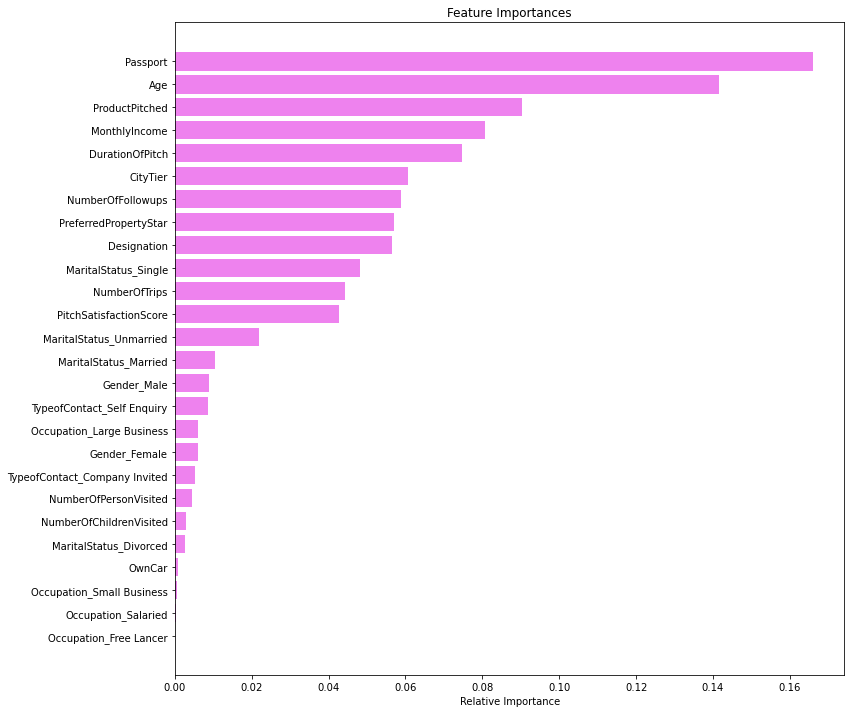

In [82]:
#GradientBoost most important features: passport, age then product pitched and monthly income
column_names = list(x.columns)
feature_names = column_names
print(feature_names)

importances = gradientboost.feature_importances_
indices = np.argsort(importances)
feature_names = list(x.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

['Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisited', 'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisited', 'Designation', 'MonthlyIncome', 'Gender_Female', 'Gender_Male', 'TypeofContact_Company Invited', 'TypeofContact_Self Enquiry', 'Occupation_Free Lancer', 'Occupation_Large Business', 'Occupation_Salaried', 'Occupation_Small Business', 'MaritalStatus_Divorced', 'MaritalStatus_Married', 'MaritalStatus_Single', 'MaritalStatus_Unmarried']


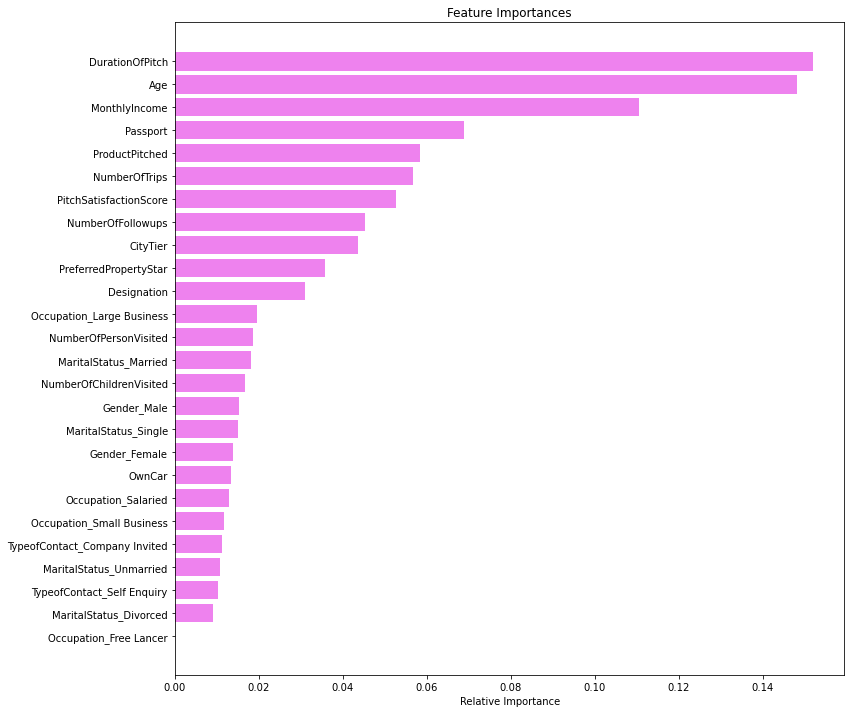

In [83]:
#GradientBoost most important features: duration of pitch, age and monthly income
column_names = list(x.columns)
feature_names = column_names
print(feature_names)

importances = gradientboost_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(x.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Conclusion gradient boost: 
- On training set, recall has improved significantly from .44 to .77
- However, tuning seems to have created overfitting on training set since most indicators show maxed values
- We note that the results of the gridsearch and observe that none of them are the max in their proposed range, indicating we seem to have captured the right range. 
- Tuning affects significantly the choice of the most important features.


In [72]:
#XGboosting classifier hypertuning
xgboost_tuned = XGBClassifier(random_state=1)
parameters = {'n_estimators': [100,125,150], 
              'subsample':[0.7, 0.8, 0.9, 1],
              'gamma':[0, 1, 3, 5],
              'colsample_bytree':[0.7, 0.8, 0.9, 1],
              'colsample_bylevel':[0.7, 0.8, 0.9, 1]
              }
scorer = metrics.make_scorer(metrics.r2_score)
grid_obj = GridSearchCV(xgboost_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(xtrain, ytrain)
xgboost_tuned = grid_obj.best_estimator_
xgboost_tuned.fit(xtrain, ytrain)




[18:26:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:26:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:26:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:26:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=8, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [73]:
xgboost_score=get_model_score(xgboost)
xgboost_score=get_metrics_score(xgboost)
xgboost_tuned_score=get_model_score(xgboost_tuned)
xgboost_tuned_score=get_metrics_score(xgboost_tuned)

R-square on training set :  0.998080311120435
R-square on test set :  0.5743089680589679
RMSE on training set :  0.017139779254776524
RMSE on test set :  0.255172669301255
Accuracy on training set :  0.9997062279670975
Accuracy on test set :  0.9348869088416724
Recall on training set :  0.9984423676012462
Recall on test set :  0.7236363636363636
Precision on training set :  1.0
Precision on test set :  0.9128440366972477
R-square on training set :  1.0
R-square on test set :  0.6191185503685502
RMSE on training set :  0.0
RMSE on test set :  0.24136918105407365
Accuracy on training set :  1.0
Accuracy on test set :  0.9417409184372858
Recall on training set :  1.0
Recall on test set :  0.7636363636363637
Precision on training set :  1.0
Precision on test set :  0.9130434782608695


['Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisited', 'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisited', 'Designation', 'MonthlyIncome', 'Gender_Female', 'Gender_Male', 'TypeofContact_Company Invited', 'TypeofContact_Self Enquiry', 'Occupation_Free Lancer', 'Occupation_Large Business', 'Occupation_Salaried', 'Occupation_Small Business', 'MaritalStatus_Divorced', 'MaritalStatus_Married', 'MaritalStatus_Single', 'MaritalStatus_Unmarried']


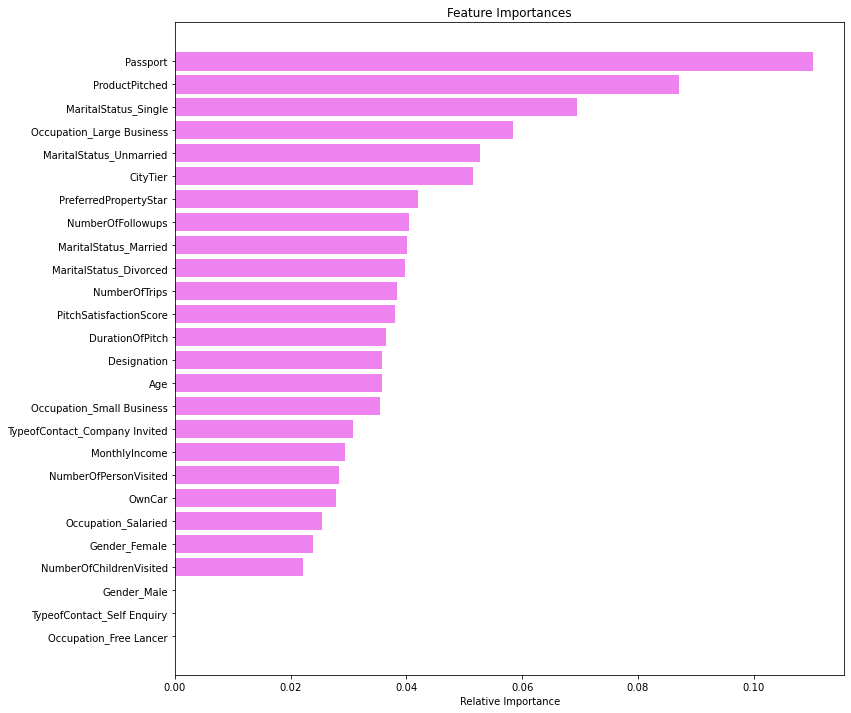

In [84]:
#XG most important features: passport, product pitched, marital status
column_names = list(x.columns)
feature_names = column_names
print(feature_names)

importances = xgboost.feature_importances_
indices = np.argsort(importances)
feature_names = list(x.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

['Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisited', 'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisited', 'Designation', 'MonthlyIncome', 'Gender_Female', 'Gender_Male', 'TypeofContact_Company Invited', 'TypeofContact_Self Enquiry', 'Occupation_Free Lancer', 'Occupation_Large Business', 'Occupation_Salaried', 'Occupation_Small Business', 'MaritalStatus_Divorced', 'MaritalStatus_Married', 'MaritalStatus_Single', 'MaritalStatus_Unmarried']


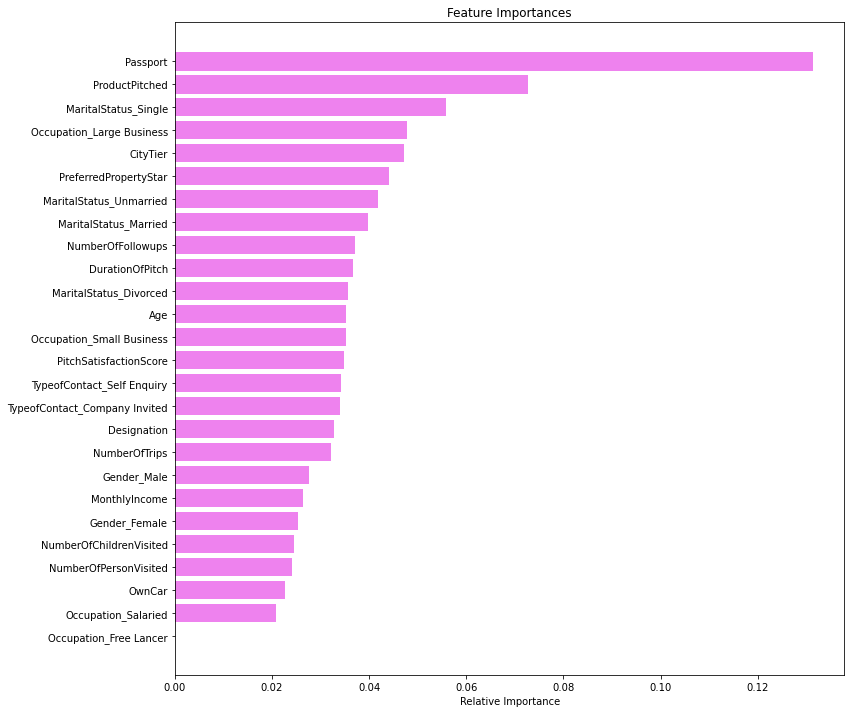

In [85]:
#XG_tuned most important features: passport, product pitched, marital status
column_names = list(x.columns)
feature_names = column_names
print(feature_names)

importances = xgboost_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(x.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
Conclusion XG boost tuning: 
The tuning improved the recall from 0.72 to 0.76 and reduced the rmse (from 0.26 to 0.24)
Features importance are unchanged

In [88]:
#STACKING
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier



In [102]:
#stacking classifer1
#We try 3 stacking. 1) with the tuned version as estimators and XGBclassifier as final estimator, 
#2) with the estimators having the best recall score; 3) with the tuned version of the estimators without adaboost
#Version 1: using tuned version as estimators
estimators=[('Decision Tree', decisiontree_tuned),('Random Forest', randomforest_tuned),
           ('Gradient Boosting', gradientboost_tuned), ('Adaboost', adaboost_tuned)
           ]
final_estimator= XGBClassifier(random_state=1)
stackingclassifier1=StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5)
stackingclassifier1.fit(xtrain,ytrain)





[20:04:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


StackingClassifier(cv=5,
                   estimators=[('Decision Tree',
                                DecisionTreeClassifier(max_depth=7,
                                                       max_leaf_nodes=25,
                                                       min_impurity_decrease=0.0001,
                                                       min_samples_leaf=15,
                                                       random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(max_features=8,
                                                       max_samples=0.6000000000000001,
                                                       min_samples_leaf=3,
                                                       n_estimators=200,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClass...
            

In [105]:
stackingclassifier1_score=get_model_score(stackingclassifier1)
stackingclassifier1_score=get_metrics_score(stackingclassifier1)


R-square on training set :  0.9961606222408702
R-square on test set :  0.596713759213759
RMSE on training set :  0.02423930827818598
RMSE on test set :  0.2483668382866781
Accuracy on training set :  0.999412455934195
Accuracy on test set :  0.9383139136394791
Recall on training set :  1.0
Recall on test set :  0.7963636363636364
Precision on training set :  0.9968944099378882
Precision on test set :  0.8656126482213439


In [ ]:
#results have improved in terms of recall! but overfitting.

In [104]:
#stacking classifer2
#Version 1: with the estimators having the best recall score
estimators=[('Decision Tree', decisiontree),('Random Forest', randomforest),
           ('Gradient Boosting', gradientboost_tuned), ('adaboost', adaboost)
           ]

final_estimator= XGBClassifier(random_state=1)
stackingclassifier1=StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5)
stackingclassifier1.fit(xtrain,ytrain)



[20:07:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


StackingClassifier(cv=5,
                   estimators=[('Decision Tree',
                                DecisionTreeClassifier(random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(max_depth=10,
                                                           max_features=0.9,
                                                           n_estimators=175,
                                                           random_state=1,
                                                           subsample=1)),
                               ('adaboost',
                                AdaBoostClassifier(random_state=1))],
                   final_estimator=XGBClassifier(...
                                                 importance_type='gain',
                                                 interaction_c

In [106]:
stackingclassifier2_score=get_model_score(stackingclassifier2)
stackingclassifier2_score=get_metrics_score(stackingclassifier2)

R-square on training set :  0.9961606222408702
R-square on test set :  0.5653470515970515
RMSE on training set :  0.02423930827818598
RMSE on test set :  0.25784470728997
Accuracy on training set :  0.999412455934195
Accuracy on test set :  0.9335161069225497
Recall on training set :  1.0
Recall on test set :  0.7527272727272727
Precision on training set :  0.9968944099378882
Precision on test set :  0.8771186440677966


v2: No improvement in terms of recall

In [107]:
#v3: stacking with the tuned version of the estimators without adaboost
#Version 1: using tuned version as estimators
estimators=[('Decision Tree', decisiontree_tuned),('Random Forest', randomforest_tuned),
           ('Gradient Boosting', gradientboost_tuned)
           ]
final_estimator= XGBClassifier(random_state=1)
stackingclassifier3=StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5)
stackingclassifier3.fit(xtrain,ytrain)



[20:09:45] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


StackingClassifier(cv=5,
                   estimators=[('Decision Tree',
                                DecisionTreeClassifier(max_depth=7,
                                                       max_leaf_nodes=25,
                                                       min_impurity_decrease=0.0001,
                                                       min_samples_leaf=15,
                                                       random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(max_features=8,
                                                       max_samples=0.6000000000000001,
                                                       min_samples_leaf=3,
                                                       n_estimators=200,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClass...
            

In [108]:
stackingclassifier3_score=get_model_score(stackingclassifier3)
stackingclassifier3_score=get_metrics_score(stackingclassifier3)



R-square on training set :  0.9904015556021755
R-square on test set :  0.5698280098280097
RMSE on training set :  0.038325711533020994
RMSE on test set :  0.256512167582532
Accuracy on training set :  0.9985311398354877
Accuracy on test set :  0.934201507882111
Recall on training set :  1.0
Recall on test set :  0.8218181818181818
Precision on training set :  0.9922720247295209
Precision on test set :  0.8278388278388278


In V3 the recall is the best!

In [122]:
# COMPARING Models
# defining list of models
models = [decisiontree, decisiontree_tuned, randomforest, randomforest_tuned, adaboost, adaboost_tuned, 
          gradientboost, gradientboost_tuned, xgboost,
         xgboost_tuned, stackingclassifier1, stackingclassifier2, stackingclassifier3]

# defining empty lists to add train and test results
r2_train = []
r2_test = []
rmse_train= []
rmse_test= []
recall_train=[]
recall_test=[]
precision_train=[]
precision_test=[]

# looping through all the models to get the rmse, r2 scores, recall and precision
for model in models:
    j = get_model_score(model,False)
    r2_train.append(j[0])
    r2_test.append(j[1])
    rmse_train.append(j[2])
    rmse_test.append(j[3])

    i = get_metrics_score(model,False)
    recall_train.append(i[2])
    recall_test.append(i[3])
    precision_train.append(i[4])
    precision_test.append(i[5])

comparison_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree','Random Forest','Tuned Random Forest',
                                          'AdaBoost', 'Tuned AdaBoost',
                                          'Gradient Boosting', 'Tuned Gradient Boosting',
                                          'XGBoost',  'Tuned XGBoost','Stackingclassifier1', 'Stackingclassifier2', 'Stackingclassifier3'], 
                                          'Train_r2': r2_train,'Test_r2': r2_test,
                                          'Train_RMSE':rmse_train,'Test_RMSE':rmse_test,
                                           'Train_Recall':recall_train,'Test_Recall':recall_test,
                                           'Train_Precision':precision_train,'Test_Precision':precision_test
                                 
                                
                                }) 
comparison_frame
    

,Model,Train_r2,Test_r2,Train_RMSE,Test_RMSE,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Decision Tree,1.000000,0.251680,0.000000,0.338322,1.000000,0.741818,1.000000,0.680000
1,Tuned Decision Tree,0.061272,-0.017178,0.379018,0.394444,0.420561,0.367273,0.697674,0.655844
2,Random Forest,1.000000,0.511576,0.000000,0.273329,1.000000,0.643636,1.000000,0.941489
3,Tuned Random Forest,0.545034,0.229275,0.263864,0.343350,0.641745,0.425455,0.983294,0.893130
4,AdaBoost,0.003681,0.058999,0.390471,0.379387,0.341121,0.360000,0.695238,0.744361
5,Tuned AdaBoost,0.011360,0.027632,0.388963,0.385658,0.292835,0.305455,0.755020,0.763636
6,Gradient Boosting,0.222526,0.179985,0.344931,0.354159,0.464174,0.440000,0.830084,0.806667
7,Tuned Gradient Boosting,1.000000,0.681852,0.000000,0.220598,1.000000,0.770909,1.000000,0.963636
8,XGBoost,0.998080,0.574309,0.017140,0.255173,0.998442,0.723636,1.000000,0.912844
9,Tuned XGBoost,1.000000,0.619119,0.000000,0.241369,1.000000,0.763636,1.000000,0.913043


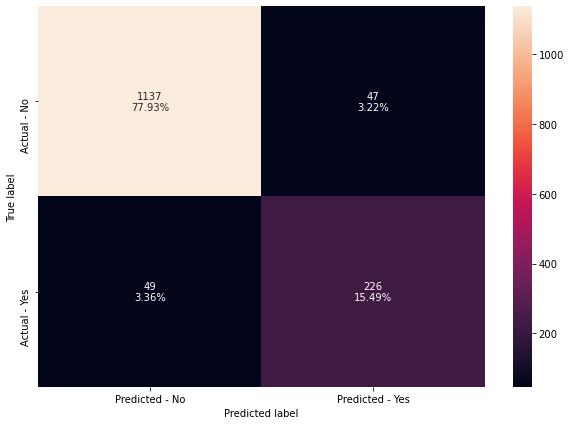

In [131]:
make_confusion_matrix(stackingclassifier3,ytest)

In [ ]:
#Conclusion model comparison:
#The best model to achieve higher recall is stacking (v3), followed by Tuned gradient boosting and Tuned XG Boost.
#Tuned gradient boosting is also interesting. It has a decent recall and has the advantage of having the 
#highest precision and the lowest RMSE on train set.



#8) Actionable Insights & Recommendations (5)
Compare models - Business recommendations and insights
- To achieve our goal of identifying potential customers for the newly introduced package, we recommend the usage of various models. 3 models are relevant (stacking, gradientboost, xgboost) although we achieve the greatest probability of detecting customers who are going to take the package with Stacking them together using certain parameters. 
- Doing show will help predicting with up to 82% success rate the consumer who are going to take the package. 
- It will also help saving on marketing cost since we will avoid pursuing and reaching out too broadly to customers who wont take the new package. Depending on the budget restrictions, it might be wise to use the model achieving the greatest level of precision with decent recall rate. In this case the gradientboosting_tuned version.
- In general, we note that most of the models concur that the 5 most important features into a client taking a package or not are : having a passport, monthlyincome, product pitched, duration of pitch, number of follow ups.
- This indicate that the marketing efforts (duration of pitch, number of follow up) do play a role in getting a new package taken.
- We also note that the segmentation of the package (notably how luxurious it is) plays an important role into a specific customer taking this package or not. Thus the segmentation of our new package will have to be carefully chosen to reach out to a maximum number of customer and/or to generate the maximum profit.
- Once the segmentation of the package has been chosen, we could re-use our models to fine tune the targeted customers. 





